In [113]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB

In [114]:
sms_raw = pd.read_csv('amazon_cells_labelled.txt', sep='\t', header = None)

In [115]:
sms_raw.columns = ['Sentence', 'Sentiment']

In [116]:
sms_raw.iloc[151:200]

,Sentence,Sentiment
151,"Audio Quality is poor, very poor.",0
152,I had absolutely no problem with this headset ...,1
153,"I know that sounds funny, but to me it seemed ...",1
154,I've bought $5 wired headphones that sound bet...,0
155,This phone is very fast with sending any kind ...,1
156,"Nice quality build, unlike some cheap s*** out...",1
157,This item is fantastic and works perfectly!,1
158,And I just love the colors!,1
159,W810i is just SUPERB.,1
160,"All I can do is whine on the Internet, so here...",0


In [117]:
negative = ['waste', 'breaks', 'lousy','cannot','waste','disappoint','disappointed','junk','poor',
           "doesn't", 'bad', "don't", 'problem', 'misleading', 'difficult','unreliable','horrible','broken','fail', 'terrible']

for word in negative:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw[str(word)] = sms_raw.Sentence.str.contains(
        ' ' + str(word) + ' ',
        case=False
    )

In [118]:
#do i need to include this? upper case might be good in terms of seniutment

# sms_raw['allcaps'] = sms_raw.Sentence.str.isupper()

In [119]:
sms_raw.head()

,Sentence,Sentiment,waste,breaks,lousy,cannot,disappoint,disappointed,junk,poor,...,bad,don't,problem,misleading,difficult,unreliable,horrible,broken,fail,terrible
0,So there is no way for me to plug it in here i...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,"Good case, Excellent value.",1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,Great for the jawbone.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,Tied to charger for conversations lasting more...,0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,The mic is great.,1,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [120]:
sms_raw['Sentiment'] = (sms_raw['Sentiment'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

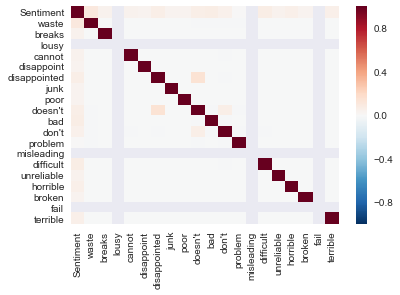

In [121]:
sns.heatmap(sms_raw.corr())

In [122]:
data = sms_raw[negative]
target = sms_raw['Sentiment']

In [123]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 444


## test it on other data sets

In [124]:
sms_raw2 = pd.read_csv('imdb_labelled.txt', sep='\t', header = None)

In [126]:
sms_raw2.columns = ['Sentence', 'Sentiment']

In [127]:
negative = ['waste', 'breaks', 'lousy','cannot','waste','disappoint','disappointed','junk','poor',
           "doesn't", 'bad', "don't", 'problem', 'misleading', 'difficult','unreliable','horrible','broken','fail', 'terrible']

for word in negative:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw2[str(word)] = sms_raw2.Sentence.str.contains(
        ' ' + str(word) + ' ',
        case=False
    )

In [128]:
sms_raw2['Sentiment'] = (sms_raw2['Sentiment'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

In [129]:
data = sms_raw2[negative]
target = sms_raw2['Sentiment']

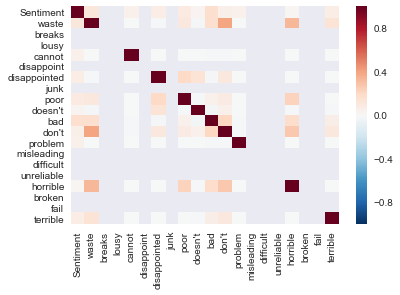

In [130]:
sns.heatmap(sms_raw2.corr())

In [131]:
# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 748 points : 310


In [133]:
##now yelp

In [134]:
sms_raw3 = pd.read_csv('yelp_labelled.txt', sep='\t', header = None)

sms_raw3.columns = ['Sentence', 'Sentiment']


In [136]:

negative = ['waste', 'breaks', 'lousy','cannot','waste','disappoint','disappointed','junk','poor',
           "doesn't", 'bad', "don't", 'problem', 'misleading', 'difficult','unreliable','horrible','broken','fail', 'terrible']

for word in negative:
    # Note that we add spaces around the key so that we're getting the word,
    # not just pattern matching.
    sms_raw3[str(word)] = sms_raw3.Sentence.str.contains(
        ' ' + str(word) + ' ',
        case=False
    )


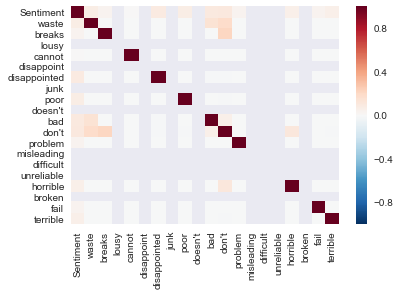

In [137]:

sms_raw3['Sentiment'] = (sms_raw3['Sentiment'] == 0)
# Note that if you run this cell a second time everything will become false.
# So... Don't.

data = sms_raw3[negative]
target = sms_raw3['Sentiment']

sns.heatmap(sms_raw3.corr())


In [138]:

# Our data is binary / boolean, so we're importing the Bernoulli classifier.
from sklearn.naive_bayes import BernoulliNB

# Instantiate our model and store it in a new variable.
bnb = BernoulliNB()

# Fit our model to the data.
bnb.fit(data, target)

# Classify, storing the result in a new variable.
y_pred = bnb.predict(data)

# Display our results.
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 453
